In [1]:
import torch

In [2]:
#학습데이터 생성
x_train = torch.FloatTensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]])
y_train = torch.FloatTensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]])

#W, b 초기화 / learning late 설정
W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 1.0

In [3]:
x_train.size()

torch.Size([12, 1])

In [3]:
#반복횟수 설정
for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)
    #Hypothesis, cost 설정
    hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
    cost = torch.mean(-y_train*torch.log(hypothesis) 
                      - (1-y_train)*torch.log(1-hypothesis)
                     )
    #경사 계산
    #W, b 업데이트
    cost.backward()
    with torch.no_grad() as grd:
        W = W - lr*W.grad
        b = b - lr*b.grad
    #학습이 잘 되는지 확인하기위한 내용 출력
    if epoch % 100 == 0:
        print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(epoch, cost.item(), W.squeeze(), b.squeeze()))

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, W: -1.451281, b: 4.406925
epoch: 200, cost: 0.398721, W: -1.898433, b: 5.773750
epoch: 300, cost: 0.390820, W: -2.174322, b: 6.609553
epoch: 400, cost: 0.387009, W: -2.367329, b: 7.191599
epoch: 500, cost: 0.384924, W: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, W: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, W: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch: 1000, cost: 0.381941, W: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, W: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1300, cost: 0.381641, W: -2.971979, b: 9.004180
epoch: 1400, cost: 0.381596, W: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1600, cost: 0.381543, W: -3.025776, b: 9.164800
epoch: 1700, cost: 0.381528, W: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

In [4]:
#x = [4.5] 혹은 [1.1]일 때, y값 확인
x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)
print(torch.round(test_result))

tensor([[0.],
        [1.]])


### 여러가지 optimizer 사용해보기

In [6]:
#W, b 초기화 / learning late 설정
W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 1.0

In [7]:
#여러가지 optimizer 사용해보기
optimizer = torch.optim.SGD([W,b], lr=1.0)
# optimizer = torch.optim.Adam([W,b], lr=1.0)
# optimizer = torch.optim.Adadelta([W,b])
# optimizer = torch.optim.Adagrad([W,b])
# optimizer = torch.optim.RMSprop([W,b])

for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)
    #Hypothesis, cost 설정
    hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
    cost = torch.mean(-y_train*torch.log(hypothesis) 
                      - (1-y_train)*torch.log(1-hypothesis)
                     )
    #다른 optimizer사용
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    #학습이 잘 되는지 확인하기위한 내용 출력
    if epoch % 100 == 0:
        print( 'epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'.format(epoch, cost.item(), W.squeeze(), b.squeeze()))

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 100, cost: 0.420221, W: -1.451281, b: 4.406925
epoch: 200, cost: 0.398721, W: -1.898433, b: 5.773750
epoch: 300, cost: 0.390820, W: -2.174322, b: 6.609553
epoch: 400, cost: 0.387009, W: -2.367329, b: 7.191599
epoch: 500, cost: 0.384924, W: -2.510626, b: 7.622530
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 700, cost: 0.382944, W: -2.707397, b: 8.212804
epoch: 800, cost: 0.382463, W: -2.776597, b: 8.420023
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587363
epoch: 1000, cost: 0.381941, W: -2.878112, b: 8.723699
epoch: 1100, cost: 0.381801, W: -2.915530, b: 8.835541
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1300, cost: 0.381641, W: -2.971979, b: 9.004180
epoch: 1400, cost: 0.381596, W: -2.993242, b: 9.067673
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1600, cost: 0.381543, W: -3.025776, b: 9.164800
epoch: 1700, cost: 0.381528, W: -3.038172, b: 9.201797
epoch: 1800, cost: 0.3

### Matplotlib으로 결과 시각화

In [8]:
#Matplotlib으로 결과 시각화
import matplotlib.pyplot as plt

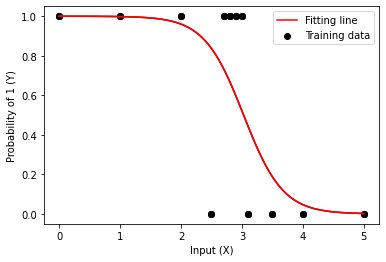

In [12]:
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train)

X = torch.linspace(0,5,100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X,W)+b)

plt.plot(X,Y)

#label 달기
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")
#점과 선의 색 변경하기
plt.scatter(x_train, y_train, c="black")
plt.plot(X,Y, c="#ff0000")
#범례 달기
plt.scatter(x_train, y_train, c="black", label="Training data")
plt.plot(X,Y, c="#ff0000", label="Fitting line")
plt.legend()

plt.show()

### Logistic Regression with sklearn

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1] # 입력 shape이 pytorch에서와 다름에 주의!

In [16]:
model = LogisticRegression(penalty='none') # penalty (or regularization)은 추후 설명
model.fit(x_train, y_train)

#W와 b에 해당하는 값 출력
print(model.coef_, model.intercept_)

[[-3.10385806]] [9.39776831]


In [17]:
# 새로운 x값이 주어질 때 y값 예측해보기
x_test = [[4.5],[1.1]]
test_result = model.predict(x_test)
print(test_result)


[0 1]
